In [31]:
library(tidyverse)

In [32]:
results = read_csv("data/experimental_results.csv")

Parsed with column specification:
cols(
  model = col_character(),
  selection_method = col_character(),
  true_hte_error = col_double(),
  true_value = col_double(),
  DGP = col_character(),
  n_train = col_double(),
  n_test = col_double(),
  n_folds = col_integer(),
  rep = col_integer()
)


In [35]:
results %>% pull(DGP) %>% unique

[1] "scenario_1"        "scenario_2"        "scenario_3"       
 [4] "scenario_4"        "scenario_5"        "scenario_6"       
 [7] "scenario_7"        "scenario_8"        "biased_scenario_1"
[10] "biased_scenario_2" "biased_scenario_3" "biased_scenario_4"
[13] "biased_scenario_5" "biased_scenario_6" "biased_scenario_7"
[16] "biased_scenario_8"

filter
mutate
select
arrange

group_by
summarize

inner_join

In [30]:
results %>% 
    group_by(DGP, selection_method) %>%
    summarize(mean_rep = mean(rep), 
              derp = sd(rep)) %>%
    filter(DGP == "scenario_1") %>%
data.frame

,DGP,selection_method,mean_rep,derp
1,scenario_1,c_benefit,1.5,0.5477226
2,scenario_1,est_te_strata,1.5,0.5477226
3,scenario_1,gain,1.5,0.5477226
4,scenario_1,match_decision,1.5,0.5477226
5,scenario_1,match_mse,1.5,0.5477226
6,scenario_1,oracle,1.5,0.5477226
7,scenario_1,oracle_selector_true_hte_error,1.5,0.5477226
8,scenario_1,oracle_selector_true_value,1.5,0.5477226
9,scenario_1,prediction_error,1.5,0.5477226
10,scenario_1,qini,1.5,0.5477226


In [19]:
subset %>% data.frame

,model,selection_method,true_hte_error,true_value,DGP,n_train,n_test,n_folds,rep
1,ranger~5~variance~1,gain,0.4081847,-0.05778412,scenario_1,1000,2000,2,1
2,enet~0.5~0.606530659712633,gain,0.1517193,0.05575092,scenario_1,1000,2000,5,1
3,ranger~3~variance~1,gain,0.3631045,0.05024745,scenario_1,1000,2000,10,1
4,ranger~7~variance~1,gain,0.4192793,0.04733223,scenario_1,1000,2000,2,2
5,ranger~5~variance~1,gain,0.4038171,-0.03579962,scenario_1,1000,2000,5,2
6,enet~0.5~0.00673794699908547,gain,0.06039874,0.07984223,scenario_1,1000,2000,10,2


In [21]:
mutate(new_variable = n_folds  + rep) %>% data.frame

,model,selection_method,true_hte_error,true_value,DGP,n_train,n_test,n_folds,rep,new_variable
1,ranger~5~variance~1,gain,0.4081847,-0.05778412,scenario_1,1000,2000,2,1,3
2,enet~0.5~0.606530659712633,gain,0.1517193,0.05575092,scenario_1,1000,2000,5,1,6
3,ranger~3~variance~1,gain,0.3631045,0.05024745,scenario_1,1000,2000,10,1,11
4,ranger~7~variance~1,gain,0.4192793,0.04733223,scenario_1,1000,2000,2,2,4
5,ranger~5~variance~1,gain,0.4038171,-0.03579962,scenario_1,1000,2000,5,2,7
6,enet~0.5~0.00673794699908547,gain,0.06039874,0.07984223,scenario_1,1000,2000,10,2,12


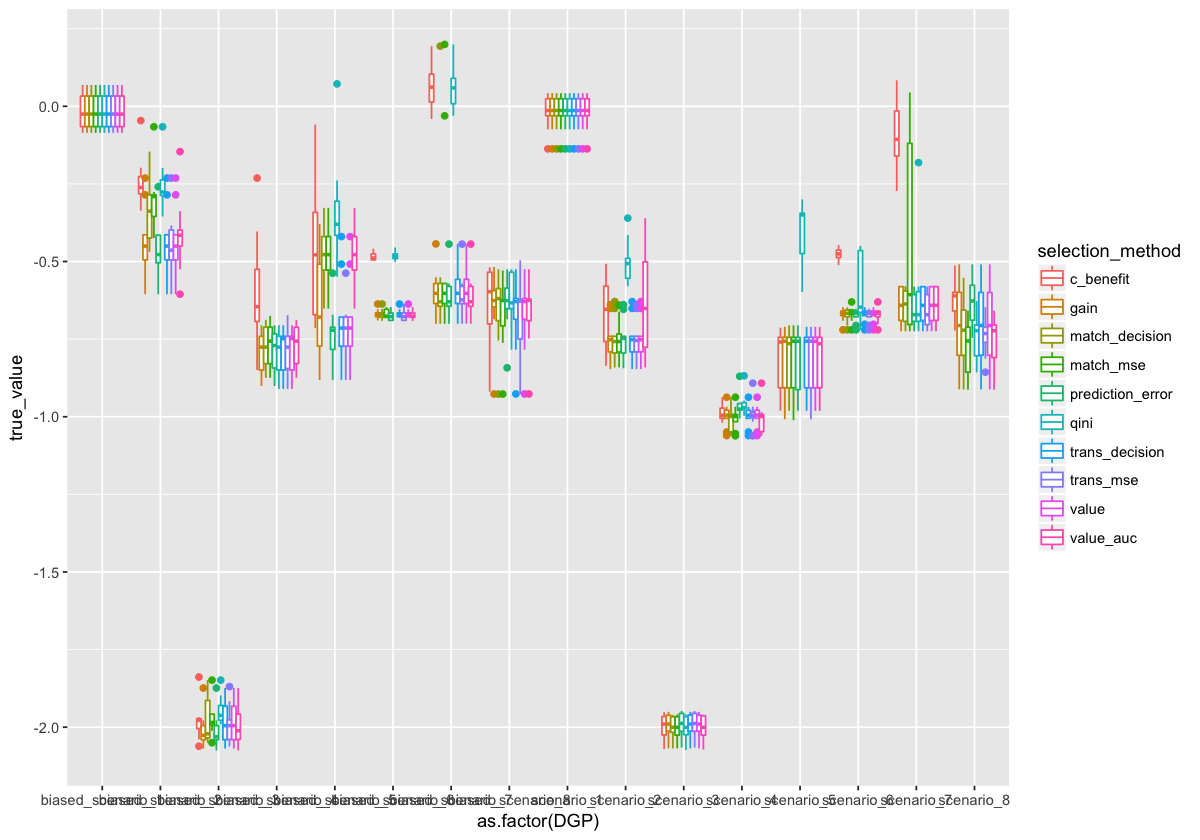

In [10]:
results %>%
ggplot(aes(x=as.factor(DGP), y=true_value, color=selection_method)) +
    geom_boxplot()

analyze with mixed effects like:
`error` $\approx$ `(1 + selection_method*n_folds)|scenario`

Remember to calculate and compare to the oracle